In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #for our Label encoding
%matplotlib inline

In [3]:
df= pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [4]:
df.columns

Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'month', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

### X-y split (y is the target variable, in this case, "total claim amount")

In [5]:
numerical_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(include=['object'])

In [9]:
numerical_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [20]:
X=numerical_df[['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
y=numerical_df['total_claim_amount']

### Train - Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

### Scaler fit

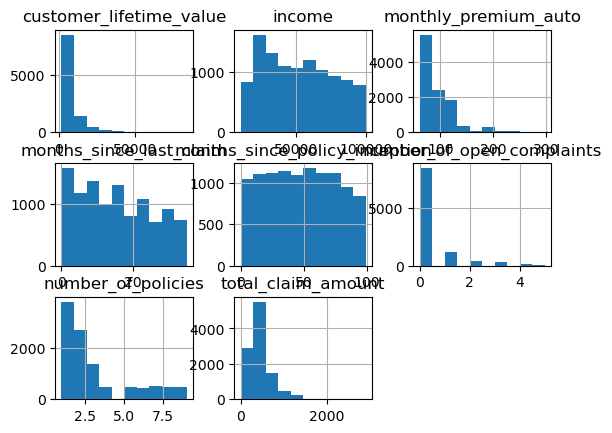

In [26]:
numerical_df.hist()
plt.show()

### this is the reason we will use power transform

In [53]:
from sklearn.preprocessing import PowerTransformer

In [54]:
scaler = PowerTransformer()

In [66]:
scaler_fit= scaler.fit(X_train)

In [67]:
scaler_transform_train= scaler.transform(X_train)

In [68]:
scaler_transform_train

array([[ 0.01867934,  1.29457565, -0.5053334 , ..., -0.45644719,
        -0.51310168,  0.51565835],
       [-1.69073871, -1.2552178 , -1.17277274, ...,  1.46636782,
        -0.51310168, -1.14160833],
       [-0.16069455,  1.60353765, -0.56959151, ..., -0.05783179,
        -0.51310168,  0.51565835],
       ...,
       [ 0.27153945, -1.64896632, -1.54853713, ..., -1.2508884 ,
        -0.51310168, -0.06056313],
       [ 0.60345815,  1.38125949,  0.92521887, ...,  0.14777252,
        -0.51310168,  0.51565835],
       [-0.56649469,  1.0361053 , -1.26132823, ...,  0.94113392,
         1.90040048,  1.45525745]])

In [69]:
scaler_transform_test= scaler.transform(X_test)

In [70]:
scaler_transform_test

array([[-1.44064526,  0.41707003, -1.0053345 , ..., -1.34790788,
        -0.51310168, -1.14160833],
       [ 0.87167078,  1.43530008,  1.39282111, ..., -0.64942406,
         2.0135164 ,  0.51565835],
       [ 0.68696923,  1.47198615,  1.24082277, ...,  1.26580825,
        -0.51310168,  0.51565835],
       ...,
       [ 1.19219248, -1.62712418,  1.82580879, ...,  1.06063983,
        -0.51310168,  1.56833921],
       [-0.26332735,  1.29544285, -1.44901097, ...,  1.6349404 ,
        -0.51310168,  1.1285646 ],
       [ 0.21937829, -0.17167265, -0.01114652, ...,  0.94113392,
        -0.51310168,  1.31314934]])

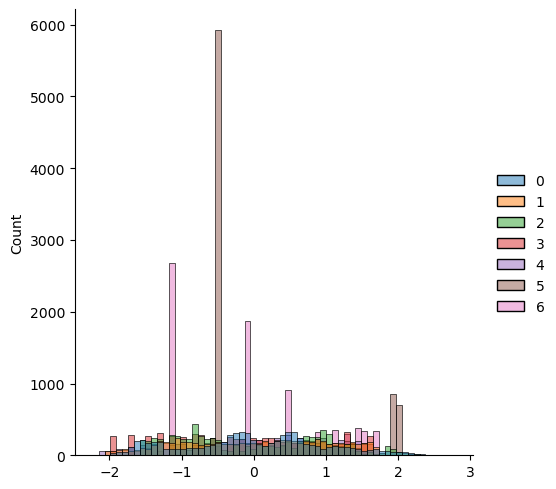

In [72]:
sns.displot(scaler_transform_train)

### Model Generation

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
#X_train = np.array(X_train).reshape(-1,1)
#y_train = np.array(y_train).reshape(-1,1)

In [128]:
lm = LinearRegression()


In [129]:
model = lm.fit(scaler_transform_train, y_train)

In [130]:
model.coef_

array([[ -2.73008582, -33.92712089, 159.74294387,   3.30934471,
         -0.82317017,  -5.78346355,   3.30105886]])

In [131]:
model.intercept_

array([434.8695536])

### TEST

In [132]:
y_test

array([[ 320],
       [ 459],
       [  22],
       ...,
       [1261],
       [  80],
       [  74]], dtype=int64)

In [133]:
y_pred

array([[-2033796.31755535],
       [-3089765.59440507],
       [-3128928.69079325],
       ...,
       [ -557092.67594126],
       [-2931409.66345504],
       [-1527655.40535959]])

In [134]:
y_pred = model.predict(X_test)

C:\Users\espan\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [135]:
y_test.shape

(3207, 1)

In [136]:
len(X_test)

3207

In [137]:
compare =pd.DataFrame({"y_test": list(y_test), "y_pred": list(y_pred)})

In [138]:
compare

,y_test,y_pred
0,[320],[-2033796.3175553503]
1,[459],[-3089765.5944050704]
2,[22],[-3128928.690793254]
3,[111],[-1152275.8766795965]
4,[1000],[-550898.1354275997]
...,...,...
3202,[446],[-3255472.038168585]
3203,[452],[-1256570.8790923783]
3204,[1261],[-557092.6759412551]
3205,[80],[-2931409.663455042]


In [139]:
y_test= np.array(y_test).reshape(-1,1)

In [140]:
y_pred= np.array(y_pred).reshape(-1,1)

In [141]:
compare_y= y_test - y_pred

In [142]:
compare_y

array([[2034116.31755535],
       [3090224.59440507],
       [3128950.69079325],
       ...,
       [ 558353.67594126],
       [2931489.66345504],
       [1527729.40535959]])

### Model Evaluation

In [143]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [144]:
mse(y_test,y_pred)

3744422020939.2935

In [145]:
mae(y_test, y_pred)

1743185.5838463756

In [146]:
import matplotlib.pyplot as plt

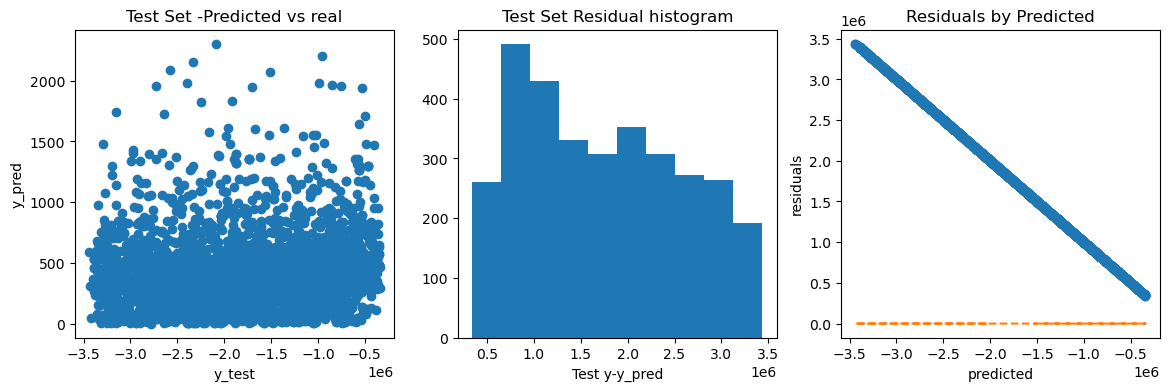

In [147]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')